In [1]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup as BS
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
URL = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'

In [3]:
artist_names = []

for page in range(1, 17):
    new_URL = URL + str(page)
    response = requests.get(new_URL)
    soup = BS(response.text)
    names = soup.findAll('h3')
    for name in names:
        artist_names.append(name.text)
        
artist_names
    

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond',
 'Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns',
 'Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran',
 'Paul Cohen',
 'Floyd Cramer',
 'Vernon Dalhart',
 'Charlie Daniels',
 'Jimmie Davis',
 'Jimmy Dean',
 'Delmore Brothers',
 'Jim Denny',
 'Little Jimmy Dickens',
 'Dean Dillon',
 'Ralph Emery',
 'The Everly Brothers',
 'Flatt And Scruggs',
 'Jim Foglesong',
 'Red Foley',
 'Tennessee Ernie Ford',
 'Fred Foster',
 'Joseph Frank',
 'Lefty Frizzell',
 'Connie B. Gay',
 'Don Gibson',
 'Vince Gill',
 'Johnny Gimble',
 'Merle Haggard',
 'Tom T. Hall',
 'Emmylou Harris',
 'George D. Hay',
 'Homer and Jethro',
 'Ro

In [4]:
years_inducted = []

for page in range(1, 17):
    new_URL = URL + str(page)
    response = requests.get(new_URL)
    soup = BS(response.text)
    for year in soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'}):
        year = str(year.text)
        year = year.strip('\n\n                    Inducted ')
        print(year)
        years_inducted.append(year)




#original text from for loop that wasn't working for some reason. transposition of year/s i think.
    #years = soup.findAll('div', attrs = {'class': 'vertical-card_content--copy'})
    #years = str(years.text)
    #years = year.strip('\n\n                    Inducted ')
    #print(years)
    #for year in years:
        #years_inducted.append(year.text)

1962
2005
2001
1966
1973
1969
2005
2013
1999
2011
2006
2019
1974
1987
2012
2019
2015
2015
1991
2005
2002
1970
1980
2009
2013
1973
2014
1976
2003
1981
2016
1972
2010
2001
1966
1983
2021
2007
2001
1985
2004
1967
1990
2016
1967
1982
1980
2001
2007
2018
1994
2008
2008
1966
2001
1982
1997
2010
2017
2006
2001
1992
1978
2001
1974
2004
2001
1997
1979
2001
1988
1966
2009
2015
2009
2011
1995
2014
1970
1996
1998
2001
1993
2015
1996
1999
1975
1984
2001
2001
1998
1992
1996
2000
2017
1967
1964
2012
1982
1961
2013
1988
1961
1986
1971
2017
2011
2010
1967
2018
2003
2012
1979
1980
1989
2019
1989
2008
2006
2021
1986
2008
1989
2007
1984
1977
2016
1965
1981
1999
2002
1997
1995
1976
1998
2018
2010
1961
2021
1968
2014
1998
2000


In [5]:
len(years_inducted)

143

In [6]:
len(artist_names)

143

In [7]:
#for loop that pulls years from single page
#years = []

#for year in soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'}):
    #year = str(year.text)
    #year = year.strip('\n\n                    Inducted ')
    #print(year)
    #years.append(year)

In [8]:
type(artist_names)

list

In [9]:
type(years_inducted)

list

In [10]:
hall_of_fame = pd.DataFrame()
hall_of_fame['Musicians'] = artist_names
hall_of_fame['Year Inducted'] = years_inducted

In [11]:
hall_of_fame

,Musicians,Year Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
138,Hank Williams Jr.,2021
139,Bob Wills,1968
140,Mac Wiseman,2014
141,Tammy Wynette,1998


In [12]:
hall_of_fame.describe()

,Musicians,Year Inducted
count,143,143
unique,143,59
top,Roy Acuff,2001
freq,1,12


In [20]:
hall_of_fame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Musicians      143 non-null    object
 1   Year Inducted  143 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


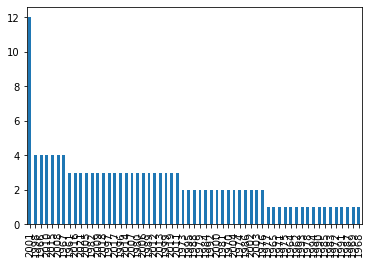

In [15]:
hall_of_fame['Year Inducted'].value_counts().plot(kind = 'bar');

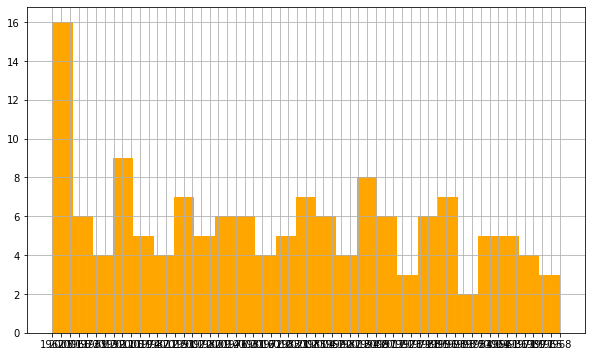

In [27]:
hall_of_fame['Year Inducted'].hist(bins = 25,
                                    color = 'orange',
                                    figsize= (10,6));

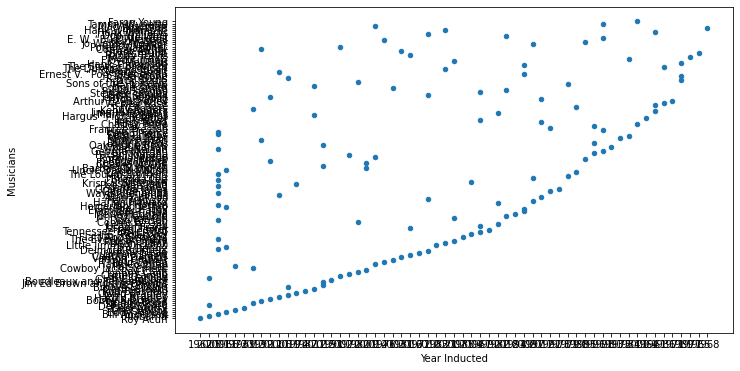

In [28]:
hall_of_fame.plot(kind = 'scatter',
                    x = 'Year Inducted',
                    y = 'Musicians',
                    figsize = (10,6));